In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Epoch 1/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.4209 - val_loss: 0.1542
Epoch 2/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1513 - val_loss: 0.1332
Epoch 3/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1393 - val_loss: 0.1332
Epoch 4/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1346 - val_loss: 0.1307
Epoch 5/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1326 - val_loss: 0.1263
Epoch 6/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.1307 - val_loss: 0.1251
Epoch 7/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1296 - val_loss: 0.1225
Epoch 8/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.1278 - val_loss: 0.1274
Epoch 9/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1273 - val_loss: 0.1218
Epoch 10/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1261 - val_loss: 0.1222
Epoch 11/50
6666/6666 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1261 - val_loss: 0.1229
Epoch 12/50
6666/66

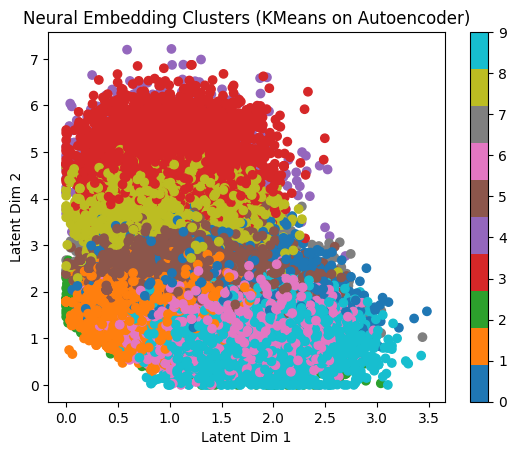

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('./preprocess.csv')
features = [
    'variance', 'Tempo', 'Loudness', 'Explicit', 'Popularity', 'Energy',
    'Danceability', 'Positiveness', 'Speechiness', 'Liveness',
    'Acousticness', 'Instrumentalness'
]

scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 6  # Latent dimension

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(12, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(12, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded)
encoder = tf.keras.models.Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

# Encode and Cluster
X_encoded = encoder.predict(X)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Add to data and plot
data['Cluster'] = clusters
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=clusters, cmap='tab10')
plt.title("Neural Embedding Clusters (KMeans on Autoencoder)")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.colorbar()
plt.show()


In [5]:
# Assuming 'autoencoder' is your trained model
autoencoder.save('song_autoencoder_model.h5')
